In [1]:
!pip install tensorflow

In [2]:
!pip install pillow 

In [3]:
!pip install imageai --upgrade

     |████████████████████████████████| 163kB 19.3MB/s 
     |████████████████████████████████| 14.9MB 205kB/s 
     |████████████████████████████████| 2.1MB 46.8MB/s 
     |████████████████████████████████| 11.6MB 37.9MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=b70148592dc1f72d4faa797a9523a1147b6d9ae599435804fef5caf5e56e0aa8
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bokeh 2.3.1 has requirement pillow>=7.1.0, but you'll have pillow 7.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing inst

https://github.com/tzutalin/labelImg 
для разметки фото

ImageAI can detect this types of things : person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop_sign, parking meter, bench,   bird, cat, dog, horse, sheep, cow, elephant, bear,zebra, giraffe,   backpack, umbrella, handbag, tie, suitcase, frisbee, skis,   snowboard, sports ball, kite, baseball bat, baseball glove,   skateboard, surfboard, tennis racket, bottle, wine glass, cup,   fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli,   carrot, hot dog, pizza, donot, cake, chair, couch, potted plant,   bed, dining table, toilet, tv, laptop, mouse, remote, keyboard,   cell phone, microwave, oven, toaster, sink, refrigerator, book,   clock, vase, scissors, teddy bear, hair dryer, toothbrush.

Будем использовать 2 модели : ResNet, YoloV3.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls '/content/gdrive/MyDrive/ColabNotebooks/Model'

resnet50_coco_best_v2.1.0.h5  yolo.h5


In [6]:
import os
from IPython.display import Image
from imageai.Detection import ObjectDetection

In [7]:
input_path = "/content/gdrive/MyDrive/ref.jpg"

Инициализация модели Resnet

In [8]:
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath("/content/gdrive/MyDrive/ColabNotebooks/Model/resnet50_coco_best_v2.1.0.h5")
detector.loadModel()

Инициализация модели YOLO

In [9]:
det = ObjectDetection()
det.setModelTypeAsYOLOv3()
det.setModelPath("/content/gdrive/MyDrive/ColabNotebooks/Model/yolo.h5")
det.loadModel()

Указываю что буду искть только холодильники на картинке

In [10]:
custom = detector.CustomObjects(refrigerator=True)

Поиск золодильников на картинке с подсчётом времени затраченного на поиск

In [11]:
%%time
detect_custom_resnet = detector.detectObjectsFromImage(
custom_objects = custom,
input_image = input_path, 
output_image_path = "/content/gdrive/MyDrive/ref(resnet).jpeg")

CPU times: user 12.5 s, sys: 2.67 s, total: 15.1 s
Wall time: 44.5 s


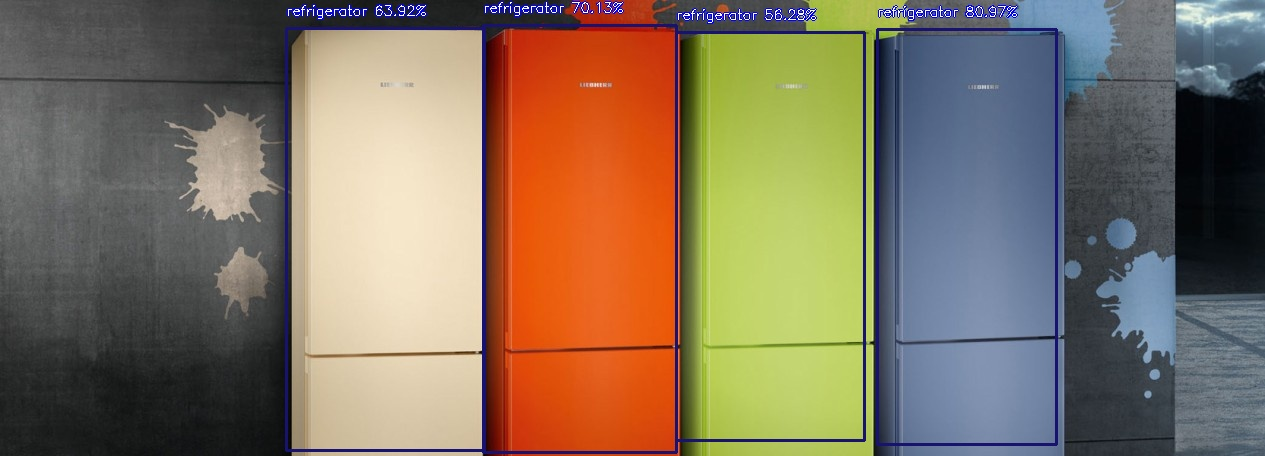

In [12]:
Image("/content/gdrive/MyDrive/ref(resnet).jpeg")

In [13]:
%%time
detect_custom_yolo = det.detectObjectsFromImage(
custom_objects = custom,
input_image = input_path, 
output_image_path = "/content/gdrive/MyDrive/ref(yolo).jpeg")

CPU times: user 5.16 s, sys: 385 ms, total: 5.55 s
Wall time: 5.76 s


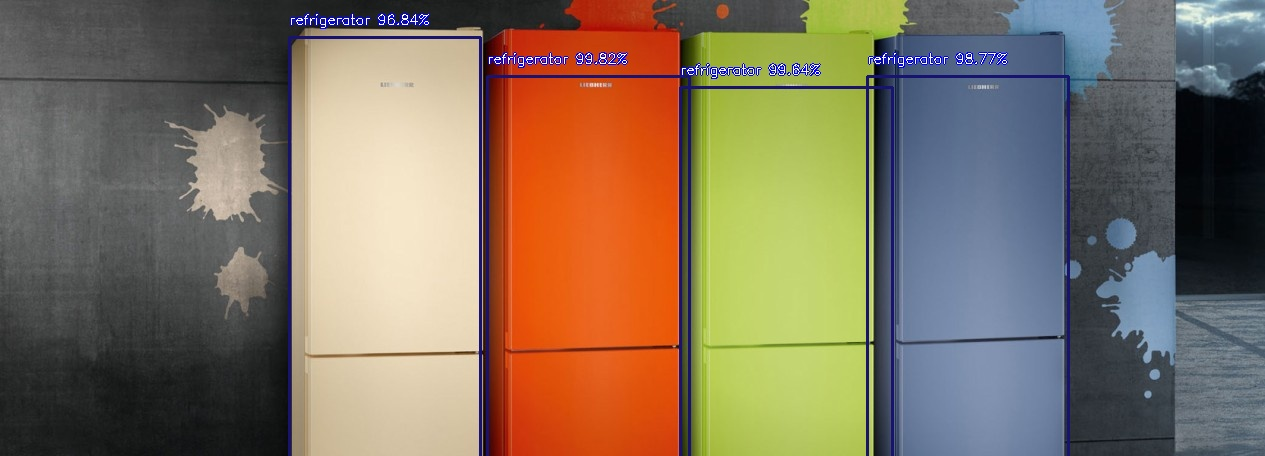

In [14]:
Image("/content/gdrive/MyDrive/ref(yolo).jpeg")

In [15]:
input_path = "/content/gdrive/MyDrive/kitchen.jpg"

In [16]:
%%time
detect_custom_resnet = detector.detectObjectsFromImage(
custom_objects = custom,
input_image = input_path, 
output_image_path = "/content/gdrive/MyDrive/kitchen(resnet).jpg")

CPU times: user 14.2 s, sys: 3.13 s, total: 17.4 s
Wall time: 17.7 s


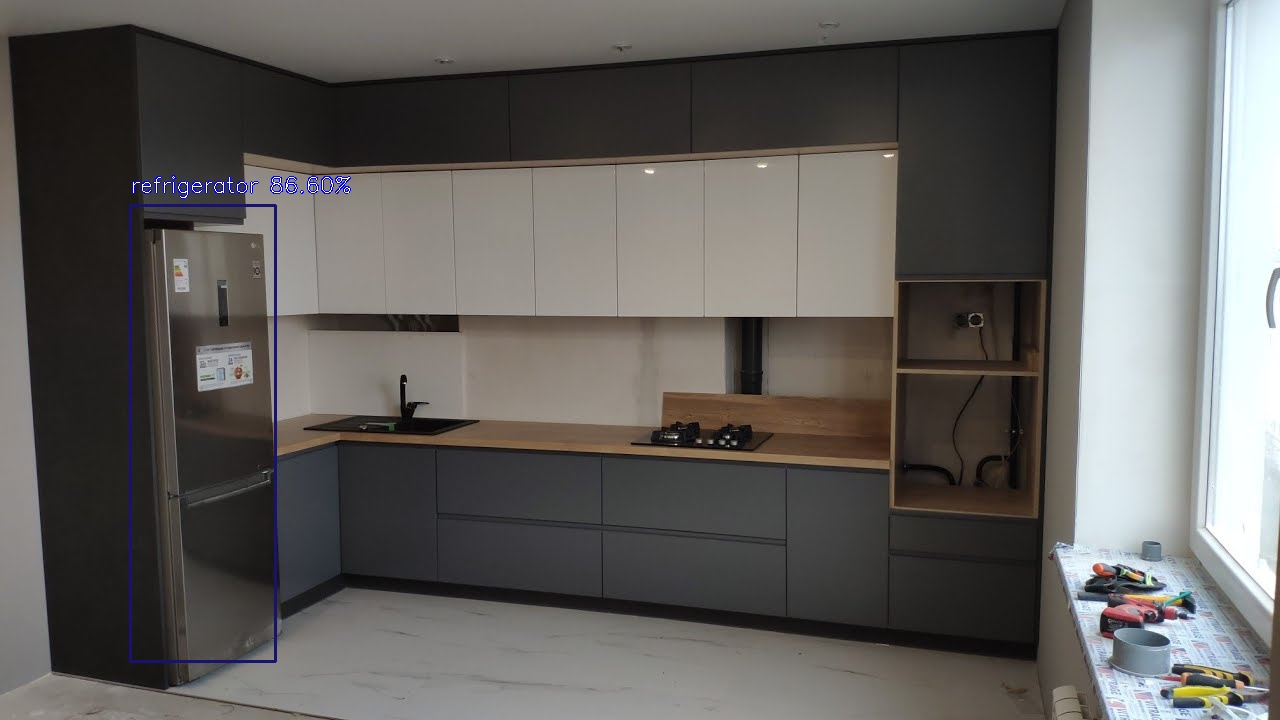

In [17]:
Image("/content/gdrive/MyDrive/kitchen(resnet).jpg")

In [18]:
%%time
detect_custom_yolo = det.detectObjectsFromImage(
custom_objects = custom,
input_image = input_path, 
output_image_path = "/content/gdrive/MyDrive/kitchen(yolo).jpg")

CPU times: user 3.7 s, sys: 19.7 ms, total: 3.72 s
Wall time: 3.9 s


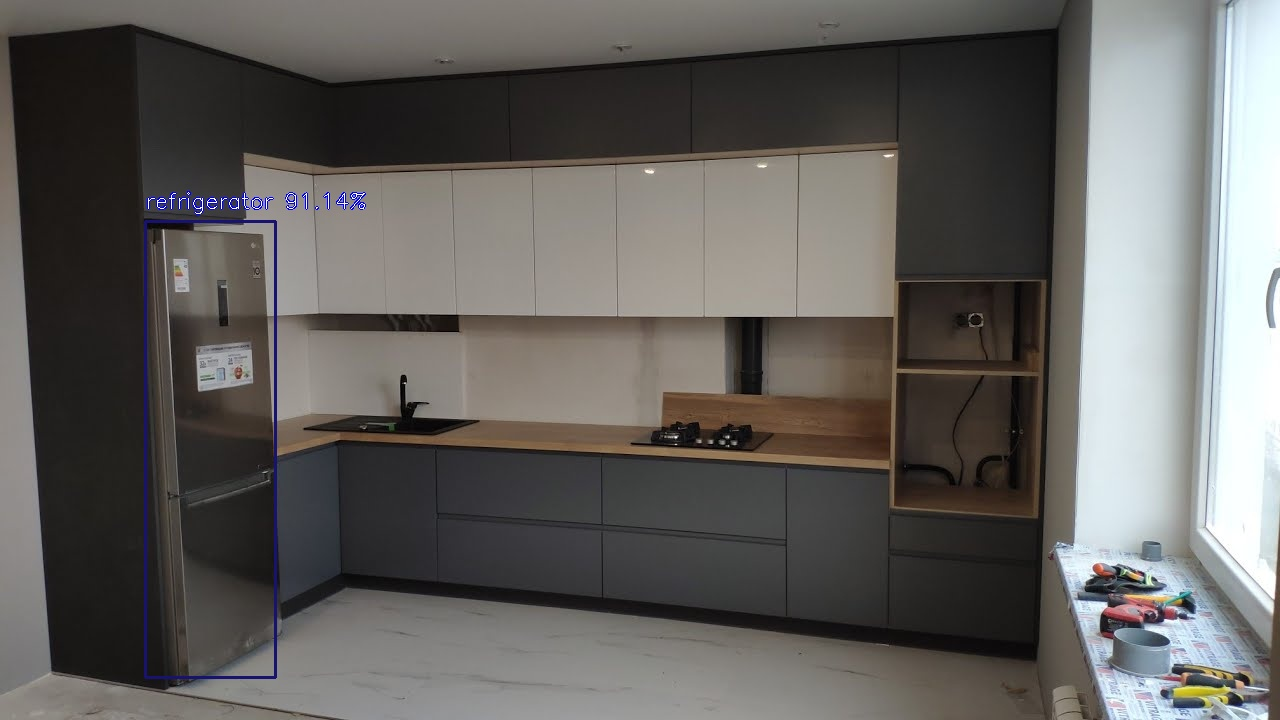

In [19]:
Image("/content/gdrive/MyDrive/kitchen(yolo).jpg")

Как видно быстрее и точне определяет золодильники модель YOLOv3.
